In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss2D(x, m, C):   
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))     
    den = 2 * np.pi * dC 
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])   
            Z[i,j] = gauss2D(xvec, m, C)

    return X, Y, Z

def posterior2D (nx, ny, m1, m2, C1, C2, P1, P2):   
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    P = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            l1 = gauss2D(xvec, m1, C1)
            l2 = gauss2D(xvec, m2, C2)
    
            P[i,j] = P1*l1 / (P1*l1+P2*l2)
            
    return P           

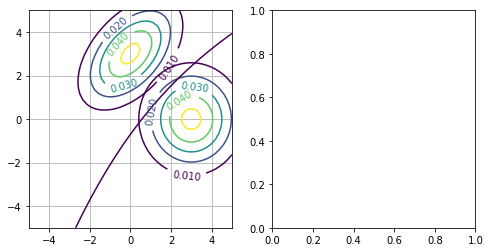

In [3]:
nx, ny = 50, 40

m1 = np.array([0, 3])
m2 = np.array([3, 0])

C1 = np.array([[2, 1], [1,2]], np.float32)
C2 = np.array([[2, 0], [0,2]])

X, Y, Z1 = twoDGaussianPlot(nx, ny, m1, C1)
X, Y, Z2 = twoDGaussianPlot(nx, ny, m2, C2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
CS = ax[0].contour(X, Y, Z1, 5)
ax[0].clabel(CS, inline=1, fontsize=10)

CS = ax[0].contour(X, Y, Z2, 5)
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].grid(True)

P1 = 0.9
P2 = 0.1
post = posterior2D(nx, ny, m1, m2, C1, C2, P1, P2)

CS = ax[0].contour(X, Y, post, 1)
ax[0].grid(True)


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


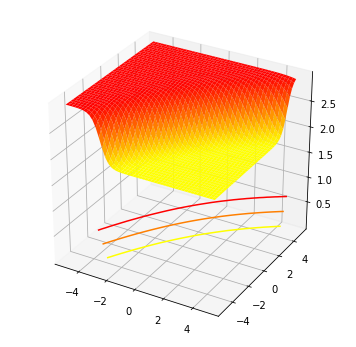

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, post+2, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(X, Y, post, 3, lw=3, cmap="autumn_r", linestyles="solid")
plt.show()